<a href="https://colab.research.google.com/github/YassineElBachiri/hello-world/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import plotly.express as px
import numpy as np # linear algebra
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
filename = "/heart.csv"
data = pd.read_csv(filename,sep=',')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,HeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,True
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,True
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,True
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,True
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,True


In [ ]:
data.info()
print('Number of rows are',data.shape[0], 'and number of columns are ',data.shape[1])

# Checking For Null Values 
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Number of rows are 303 and number of columns are  14


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
# Check for duplicates
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
# Remove duplicate rows from the df
data.drop_duplicates(keep='first',inplace=True)

In [ ]:
# verify if the duplicate row is removed
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [ ]:
#check for new shape after the removal of duplicate row
print('Number of rows are',data.shape[0], 'and number of columns are ',data.shape[1])

Number of rows are 302 and number of columns are  14


In [ ]:
data = data.reset_index()
data = data.drop("index", axis=1)
data.head()
print('Number of rows are',data.shape[0], 'and number of columns are ',data.shape[1])


Number of rows are 302 and number of columns are  14


In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# correlation matrix
cor_mat = data.corr()
cor_mat

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [ ]:
# Heatmap representing correlation matrix
figure1 = px.imshow(cor_mat, color_continuous_scale='RdBu_r', origin='lower')
figure1.show()

In [ ]:
data['age'].nunique()


41

In [ ]:
age_lst = data['age'].value_counts().index
nop_age = data['age'].value_counts().values
print("unique Age in data:  ")
print(age_lst)
print("count of each unique Age in data:  ")
print(nop_age)

unique Age in data:  
Int64Index([58, 57, 54, 59, 52, 51, 62, 56, 44, 60, 41, 64, 67, 63, 43, 55, 42,
            61, 65, 53, 45, 50, 48, 46, 66, 47, 49, 70, 39, 68, 35, 71, 40, 69,
            34, 37, 38, 29, 74, 76, 77],
           dtype='int64')
count of each unique Age in data:  
[19 17 16 14 13 12 11 11 11 11 10 10  9  9  8  8  8  8  8  8  8  7  7  7
  7  5  5  4  4  4  4  3  3  3  2  2  2  1  1  1  1]


In [ ]:
fig = px.histogram(data, 
             x='age',
             nbins=10,
             title='Age v/s count of each unique Age'
            )
fig.show()

In [ ]:
fig = px.histogram(data[data['output'] == 1], 
             x='age',
             nbins=10,
             title='Age v/s count of heart attacks'
            )
fig.show()

In [ ]:
data['sex'].value_counts()


1    206
0     96
Name: sex, dtype: int64

In [ ]:
sex_name = ['Male', 'Female']
sex_count = data[data['output'] == 1]['sex'].value_counts().values
fig = px.histogram(x=sex_name, 
             y=sex_count,
             color = sex_name,
             title='Gender v/s count of heart attacks'
            )
fig.show()

In [ ]:
data['cp'].value_counts()


0    143
2     86
1     50
3     23
Name: cp, dtype: int64

In [ ]:
cp_type = ['Typical Angina(0)', 'Atypical Angina-1', 'Non-anginal Pain-2', 'Asymptomatic-3']
cp_type_count = data[data['output'] == 1]['cp'].value_counts().values
fig = px.histogram(x=cp_type,
             y=cp_type_count, 
            color=cp_type,
             title='Chest Pain(cp) v/s count of Heart attacks'
            )
fig.show()

In [ ]:
data['trtbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trtbps, dtype: int64

In [ ]:
bins = [80,120,130,140,180,np.inf]
labels = ['Normal', 'Prehypertension','Hypertension stage I','Hypertension stage II','Hypertensive crisis']
data['blood_pressure_stage'] = pd.cut(data['trtbps'], bins=bins, labels=labels)
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,blood_pressure_stage
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Hypertension stage II
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Prehypertension
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Prehypertension
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Normal
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Normal


In [ ]:
x = labels = ['Normal', 'Prehypertension','Hypertension stage I','Hypertension stage II','Hypertensive crisis']
y = data[data['output'] == 1]['blood_pressure_stage'].value_counts().values


fig = px.histogram(x=x, 
             y=y,
             color=y,
             title='Resting Blood pressure(trtbps) stage v/s count of heart attacks'
            )
fig.show()

In [ ]:
#Scatter Matrix of the dataframe
fig = px.scatter_matrix(data,
                       height=1400,
                       width = 1500)
fig.show()

In [ ]:
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,blood_pressure_stage
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Hypertension stage II
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Prehypertension
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Prehypertension
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Normal
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Normal


In [ ]:
data = data.drop(['blood_pressure_stage','chol','trtbps','fbs','thalachh'], axis = 1)
data

,age,sex,cp,restecg,exng,oldpeak,slp,caa,thall,output
0,63,1,3,0,0,2.3,0,0,1,1
1,37,1,2,1,0,3.5,0,0,2,1
2,41,0,1,0,0,1.4,2,0,2,1
3,56,1,1,1,0,0.8,2,0,2,1
4,57,0,0,1,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,1,1,0.2,1,0,3,0
298,45,1,3,1,0,1.2,1,0,3,0
299,68,1,0,1,0,3.4,1,2,3,0
300,57,1,0,1,1,1.2,1,1,3,0


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indices in split.split(data, data['output']):
    strat_train_set = data.loc[train_indices]
    strat_test_set = data.loc[test_indices]

In [ ]:
strat_train_set

,age,sex,cp,restecg,exng,oldpeak,slp,caa,thall,output
59,57,0,0,0,0,0.0,2,1,2,1
246,66,1,1,1,1,0.0,1,3,1,0
288,55,0,0,2,1,2.0,1,1,3,0
287,57,1,0,1,1,3.0,1,1,3,0
64,58,1,2,0,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
39,65,0,2,0,0,0.8,2,0,2,1
115,37,0,2,1,0,0.0,2,0,2,1
139,64,1,0,1,1,0.2,1,1,3,1
163,38,1,2,1,0,0.0,2,4,2,1


In [ ]:
X_train = strat_train_set.drop("output", axis=1)
y_train = strat_train_set["output"].copy()
X_test = strat_test_set.drop("output", axis=1)
y_test = strat_test_set["output"].copy()
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (241, 9) (241,)
Shape for testing data (61, 9) (61,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {}

In [ ]:
from sklearn import model_selection
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
predicted=lr_model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
models['logistic_regression'] = accuracy_score(y_test, predicted)*100

Confusion Matrix : 
 [[18 10]
 [ 3 30]]


The accuracy of Logistic Regression is :  78.68852459016394 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
  
predicted = gnb_model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
models['Gaussian_Naive_Bayes'] = accuracy_score(y_test, predicted)*100

The accuracy of Gaussian Naive Bayes model is :  81.9672131147541 %


In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
  
predicted = svm_model.predict(X_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
models['svm'] = accuracy_score(y_test, predicted)*100


The accuracy of SVM is :  68.85245901639344 %


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1)  
knn_model.fit(X_train, y_train)
predicted = knn_model.predict(X_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
models['knn'] = accuracy_score(y_test, predicted)*100

[[19  9]
 [ 5 28]]
The accuracy of KNN is :  77.04918032786885 %


In [ ]:
for model in models:
    print(str(model)," : ",str(models[model]))

logistic_regression  :  78.68852459016394
Gaussian_Naive_Bayes  :  81.9672131147541
svm  :  68.85245901639344
knn  :  77.04918032786885


Text(0, 0.5, 'Error Rate')

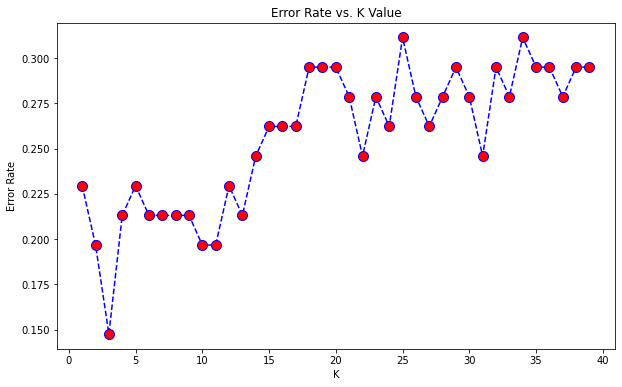

In [ ]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
print(" the right k value :",error_rate.index(min(error_rate)))

 the right k value : 2


In [ ]:

knn_o_model = KNeighborsClassifier(n_neighbors =error_rate.index(min(error_rate)))
  
knn_o_model.fit(X_train, y_train)
predicted = knn_o_model.predict(X_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")


Confusion Matrix :
[[26  2]
 [10 23]]


The accuracy of KNN is :  80.32786885245902 %
